In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the balanced dataset
balanced7030 = pd.read_csv('short_df.csv', low_memory=False)

# Assuming 'loan_status' is your target variable
# Rename the target column if needed (optional step, depending on your CSV structure)
balanced7030_df = pd.DataFrame(balanced7030)
balanced7030_df['loan_default'] = balanced7030['loan_status']

# Preview the DataFrame
print(balanced7030_df.head())


   loan_amnt  term  int_rate  installment  annual_inc  delinq_2yrs  grade_A  \
0    30000.0    60     12.29       671.74    150000.0          0.0        0   
1    35000.0    36      7.89      1095.00    165000.0          0.0        1   
2    27000.0    36     10.99       883.82     60000.0          0.0        0   
3    22000.0    36     11.53       725.79     60000.0          0.0        0   
4     9750.0    36     12.99       328.47    400000.0          1.0        0   

   grade_B  grade_C  grade_D  ...  grade_G  home_ownership_ANY  \
0        0        1        0  ...        0                   0   
1        0        0        0  ...        0                   0   
2        1        0        0  ...        0                   0   
3        1        0        0  ...        0                   0   
4        1        0        0  ...        0                   0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                        1                    0        

In [5]:
numeric_data = balanced7030.select_dtypes(include=['number'])

In [7]:
numeric_data.head()

,loan_amnt,term,int_rate,installment,annual_inc,delinq_2yrs,grade_A,grade_B,grade_C,grade_D,...,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc,loan_status
0,30000.0,60,12.29,671.74,150000.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,11.0,0
1,35000.0,36,7.89,1095.00,165000.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,20.0,0
2,27000.0,36,10.99,883.82,60000.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,9.0,0
3,22000.0,36,11.53,725.79,60000.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,14.0,0
4,9750.0,36,12.99,328.47,400000.0,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,4.0,0


In [9]:
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'open_acc', 'loan_status']  # replace with your column names
short_df = numeric_data[selected_columns]

In [11]:
short_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,delinq_2yrs,grade_A,grade_B,grade_C,grade_D,...,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc,loan_status
0,30000.0,60,12.29,671.74,150000.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,11.0,0
1,35000.0,36,7.89,1095.00,165000.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,20.0,0
2,27000.0,36,10.99,883.82,60000.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,9.0,0
3,22000.0,36,11.53,725.79,60000.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,14.0,0
4,9750.0,36,12.99,328.47,400000.0,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,4.0,0


In [13]:
short_df.shape

(4063, 21)

In [15]:
# Check for missing values
missing_values = short_df.isna().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
loan_amnt                  0
term                       0
int_rate                   0
installment                0
annual_inc                 0
delinq_2yrs                0
grade_A                    0
grade_B                    0
grade_C                    0
grade_D                    0
grade_E                    0
grade_F                    0
grade_G                    0
home_ownership_ANY         0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
open_acc                   0
loan_status                0
dtype: int64


In [17]:
short_df.to_csv("short_df.csv", index=False)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#file_path = '/Users/andres/Desktop/IE/Capstone Project/Loans/loan_balanced.csv'
#data = pd.read_csv(file_path)
data =short_df

# Selecting features and target variable
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Encoding categorical variables if necessary (assuming all categorical variables are already encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Lasso regression model
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.20473935797724838
R^2 Score: -0.001379078754357499


In [23]:
coefficient = lasso.coef_
print(coefficient)

[ 0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
  0.  0.]


In [25]:
data.shape

(4063, 21)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = short_df.drop(columns=['loan_status'])
y = short_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Optional: Print the model's coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.18550806616768617
R^2 Score: 0.09268106417944821
Coefficients: [-3.93571054e-06  1.46964361e-03  3.58510532e-02  1.11550987e-04
 -4.25974385e-07  1.65774859e-02  9.56613601e-02  7.25658540e-02
  5.15605819e-02  3.16587822e-02 -9.41524539e-03 -1.39804298e-01
 -1.02227035e-01  5.55111512e-17 -5.79083462e-04  0.00000000e+00
  0.00000000e+00 -4.89621158e-02  4.95411992e-02  4.60512434e-03]
Intercept: -0.3463691849718792


In [29]:
short_df.shape

(4063, 21)

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Instantiate the model
logreg = LogisticRegression(random_state=16, max_iter=1000)

In [35]:
print(logreg)

LogisticRegression(max_iter=1000, random_state=16)


In [37]:
X_train.shape

(3047, 20)

In [39]:
X_test.shape

(1016, 20)

In [41]:
# Step 1: Fit the model on the training data
logreg.fit(X_train, y_train)

# Step 2: Make predictions on the test data
y_pred = logreg.predict(X_test)

# Step 3: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.7293307086614174
Confusion Matrix:
[[696  34]
 [241  45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.84       730
           1       0.57      0.16      0.25       286

    accuracy                           0.73      1016
   macro avg       0.66      0.56      0.54      1016
weighted avg       0.69      0.73      0.67      1016



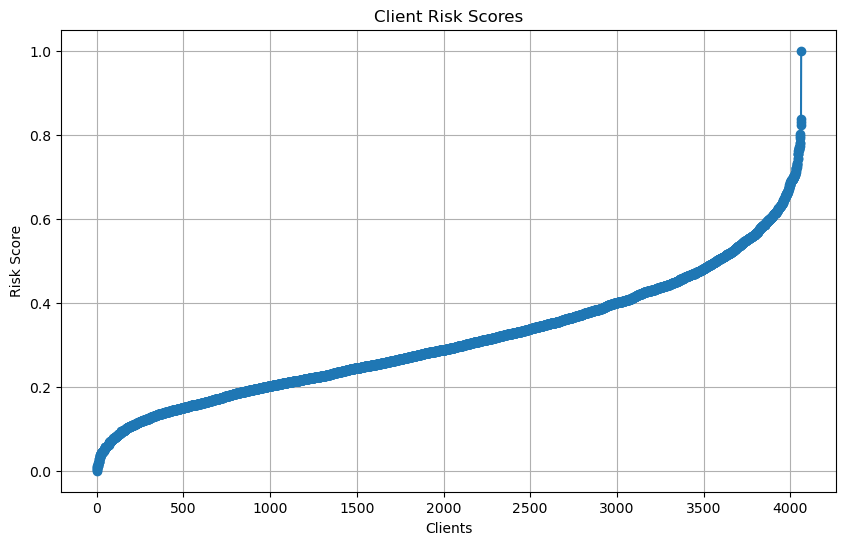

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Feature Engineering: Create a composite risk score
# Assuming higher loan amount, higher interest rate, lower annual income, and higher delinquencies indicate higher risk
df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                   (df['int_rate'] / df['int_rate'].max()) - \
                   (df['annual_inc'] / df['annual_inc'].max()) + \
                   (df['delinq_2yrs'] / df['delinq_2yrs'].max())

# Normalize the risk score
df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Sort the clients by risk score
df_sorted = df.sort_values('risk_score')

# Plot the risk scores
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['risk_score'].values, marker='o')
plt.title('Client Risk Scores')
plt.xlabel('Clients')
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()


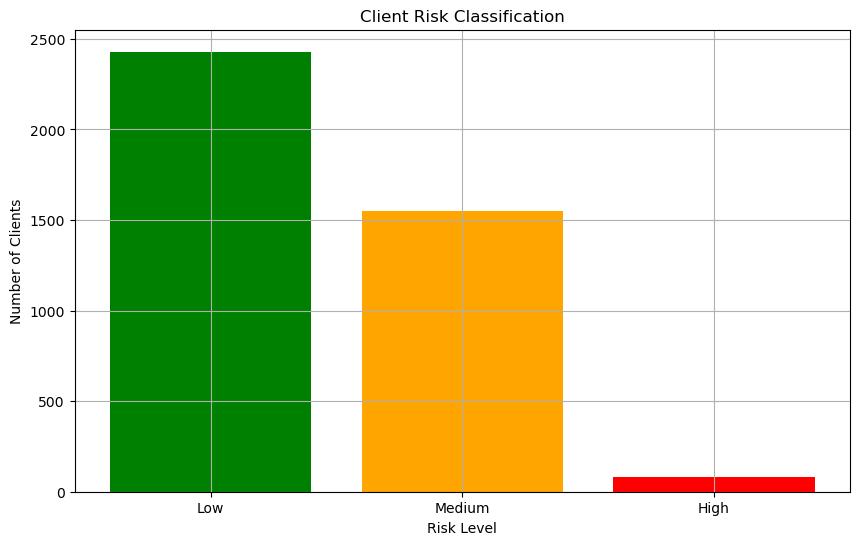

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Feature Engineering: Create a composite risk score
df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                   (df['int_rate'] / df['int_rate'].max()) - \
                   (df['annual_inc'] / df['annual_inc'].max()) + \
                   (df['delinq_2yrs'] / df['delinq_2yrs'].max())

# Normalize the risk score
df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Categorize risk levels
df['risk_level'] = pd.cut(df['risk_score'], bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=['Low', 'Medium', 'High'])

# Plot the distribution of risk levels
risk_counts = df['risk_level'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(risk_counts.index, risk_counts.values, color=['green', 'orange', 'red'])
plt.title('Client Risk Classification')
plt.xlabel('Risk Level')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()


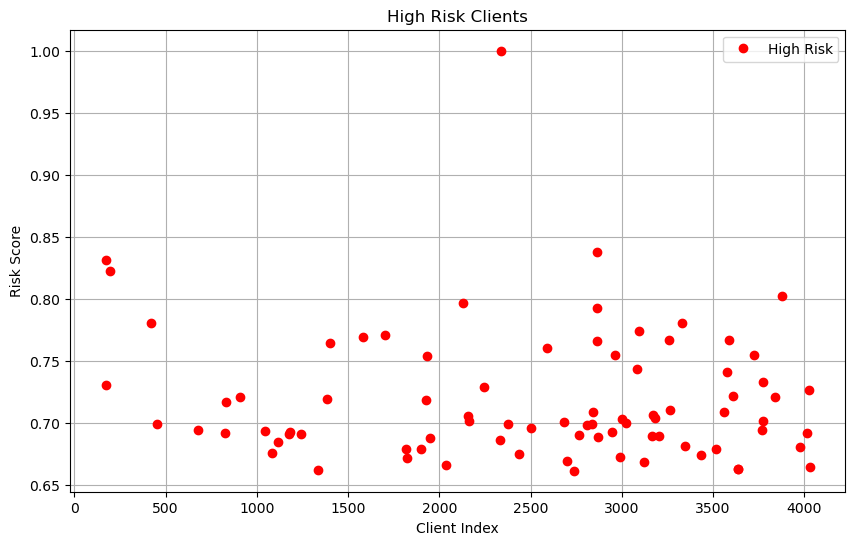

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Feature Engineering: Create a composite risk score
df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                   (df['int_rate'] / df['int_rate'].max()) - \
                   (df['annual_inc'] / df['annual_inc'].max()) + \
                   (df['delinq_2yrs'] / df['delinq_2yrs'].max())

# Normalize the risk score
df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Categorize risk levels
df['risk_level'] = pd.cut(df['risk_score'], bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=['Low', 'Medium', 'High'])

# Filter for high-risk clients
high_risk_clients = df[df['risk_level'] == 'High']

# Plot the high-risk clients
plt.figure(figsize=(10, 6))
plt.plot(high_risk_clients.index, high_risk_clients['risk_score'].values, 'ro', label='High Risk')
plt.title('High Risk Clients')
plt.xlabel('Client Index')
plt.ylabel('Risk Score')
plt.legend()
plt.grid(True)
plt.show()


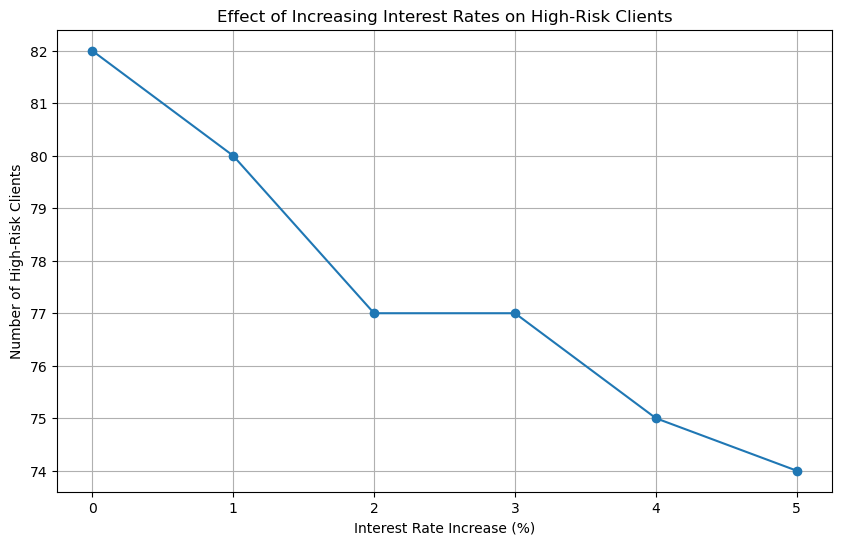

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Function to calculate risk score
def calculate_risk_score(df, interest_rate_increment=0):
    df['adjusted_int_rate'] = df['int_rate'] + interest_rate_increment
    df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                       (df['adjusted_int_rate'] / df['adjusted_int_rate'].max()) - \
                       (df['annual_inc'] / df['annual_inc'].max()) + \
                       (df['delinq_2yrs'] / df['delinq_2yrs'].max())
    df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())
    df['risk_level'] = pd.cut(df['risk_score'], bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=['Low', 'Medium', 'High'])
    return df

# Simulate different interest rate increments
interest_rate_increments = [0, 1, 2, 3, 4, 5]  # Increase by 0% to 5%
high_risk_counts = []

for increment in interest_rate_increments:
    df_adjusted = calculate_risk_score(df.copy(), interest_rate_increment=increment)
    high_risk_count = df_adjusted[df_adjusted['risk_level'] == 'High'].shape[0]
    high_risk_counts.append(high_risk_count)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_increments, high_risk_counts, marker='o')
plt.title('Effect of Increasing Interest Rates on High-Risk Clients')
plt.xlabel('Interest Rate Increase (%)')
plt.ylabel('Number of High-Risk Clients')
plt.grid(True)
plt.show()


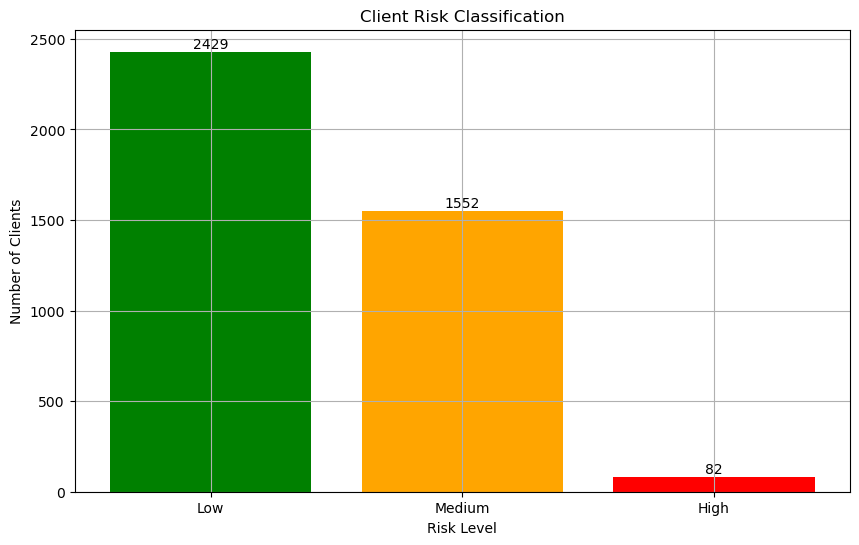

Number of high-risk clients: 82


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Feature Engineering: Create a composite risk score
df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                   (df['int_rate'] / df['int_rate'].max()) - \
                   (df['annual_inc'] / df['annual_inc'].max()) + \
                   (df['delinq_2yrs'] / df['delinq_2yrs'].max())

# Normalize the risk score
df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Categorize risk levels
df['risk_level'] = pd.cut(df['risk_score'], bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=['Low', 'Medium', 'High'])

# Count the number of clients in each risk level
risk_counts = df['risk_level'].value_counts().sort_index()

# Plot the distribution of risk levels
plt.figure(figsize=(10, 6))
bars = plt.bar(risk_counts.index, risk_counts.values, color=['green', 'orange', 'red'])
plt.title('Client Risk Classification')
plt.xlabel('Risk Level')
plt.ylabel('Number of Clients')
plt.grid(True)

# Annotate the bars with the exact number of clients
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

# Print the exact number of high-risk clients
high_risk_clients_count = risk_counts['High']
print(f'Number of high-risk clients: {high_risk_clients_count}')


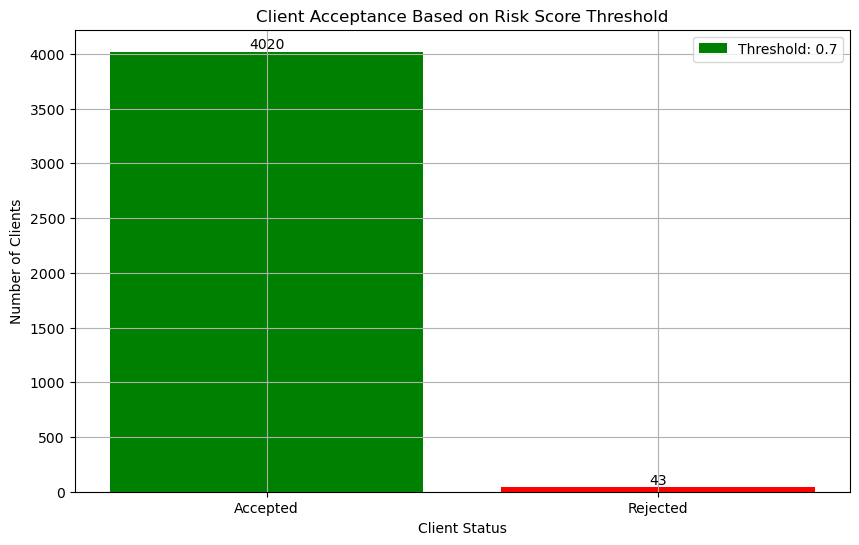

Number of accepted clients: 4020
Number of rejected clients: 43


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Feature Engineering: Create a composite risk score
df['risk_score'] = (df['loan_amnt'] / df['loan_amnt'].max()) + \
                   (df['int_rate'] / df['int_rate'].max()) - \
                   (df['annual_inc'] / df['annual_inc'].max()) + \
                   (df['delinq_2yrs'] / df['delinq_2yrs'].max())

# Normalize the risk score
df['risk_score'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Define a risk score threshold
threshold = 0.7

# Categorize clients based on the threshold
df['accepted'] = df['risk_score'] < threshold

# Count the number of accepted and rejected clients
accepted_count = df['accepted'].sum()
rejected_count = (~df['accepted']).sum()

# Plot the number of accepted and rejected clients
plt.figure(figsize=(10, 6))
bars = plt.bar(['Accepted', 'Rejected'], [accepted_count, rejected_count], color=['green', 'red'])
plt.title('Client Acceptance Based on Risk Score Threshold')
plt.xlabel('Client Status')
plt.ylabel('Number of Clients')
plt.grid(True)

# Annotate the bars with the exact number of clients
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Add legend with threshold information
plt.legend([f'Threshold: {threshold}'], loc='upper right')

plt.show()

# Print the exact numbers
print(f'Number of accepted clients: {accepted_count}')
print(f'Number of rejected clients: {rejected_count}')


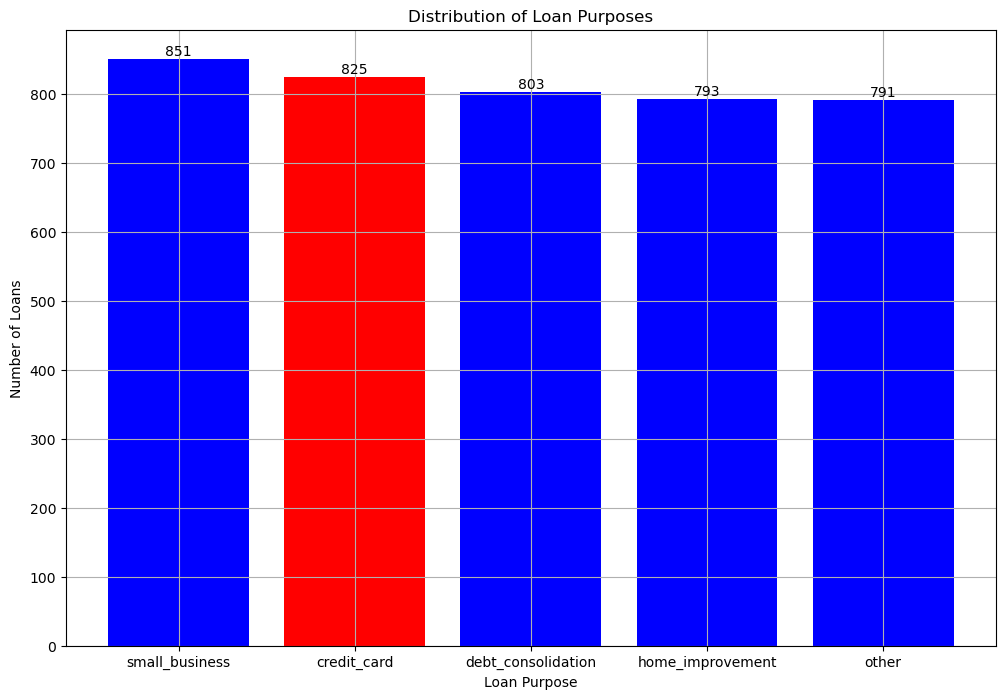

loan_purpose
small_business        851
credit_card           825
debt_consolidation    803
home_improvement      793
other                 791
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Check if 'loan_purpose' column exists, else create a mock one for demonstration
if 'loan_purpose' not in df.columns:
    import numpy as np
    np.random.seed(0)
    df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Count the occurrences of each loan purpose
purpose_counts = df['loan_purpose'].value_counts()

# Plot the distribution of loan purposes
plt.figure(figsize=(12, 8))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=['blue' if purpose != 'credit_card' else 'red' for purpose in purpose_counts.index])
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.grid(True)

# Annotate the bars with the exact number of loans
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

# Print the exact counts
print(purpose_counts)

Number of Debt Consolidation Loans: 803
Average Loan Amount for Debt Consolidation: $15001.56
Average Interest Rate for Debt Consolidation: 14.02%


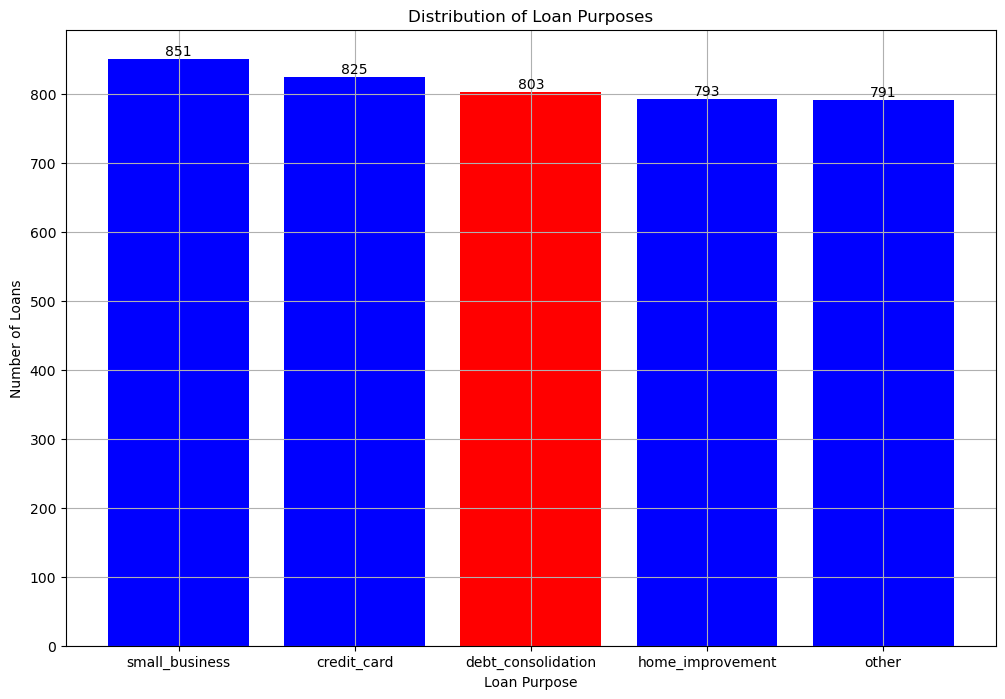

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Filter for debt consolidation loans
debt_consolidation_df = df[df['loan_purpose'] == 'debt_consolidation']

# Calculate relevant statistics
num_debt_consolidation_loans = len(debt_consolidation_df)
avg_loan_amount = debt_consolidation_df['loan_amnt'].mean()
avg_interest_rate = debt_consolidation_df['int_rate'].mean()

# Print statistics
print(f'Number of Debt Consolidation Loans: {num_debt_consolidation_loans}')
print(f'Average Loan Amount for Debt Consolidation: ${avg_loan_amount:.2f}')
print(f'Average Interest Rate for Debt Consolidation: {avg_interest_rate:.2f}%')

# Visualize the distribution of loan purposes, highlighting debt consolidation
purpose_counts = df['loan_purpose'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=['blue' if purpose != 'debt_consolidation' else 'red' for purpose in purpose_counts.index])
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.grid(True)

# Annotate the bars with the exact number of loans
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()


Number of Debt Consolidation Loans: 803
Average Loan Amount for Debt Consolidation: $15001.56
Total Loan Amount for Debt Consolidation: $12046250.00
Number of Small Business Loans: 851
Average Loan Amount for Small Business: $14784.17
Total Loan Amount for Small Business: $12581325.00


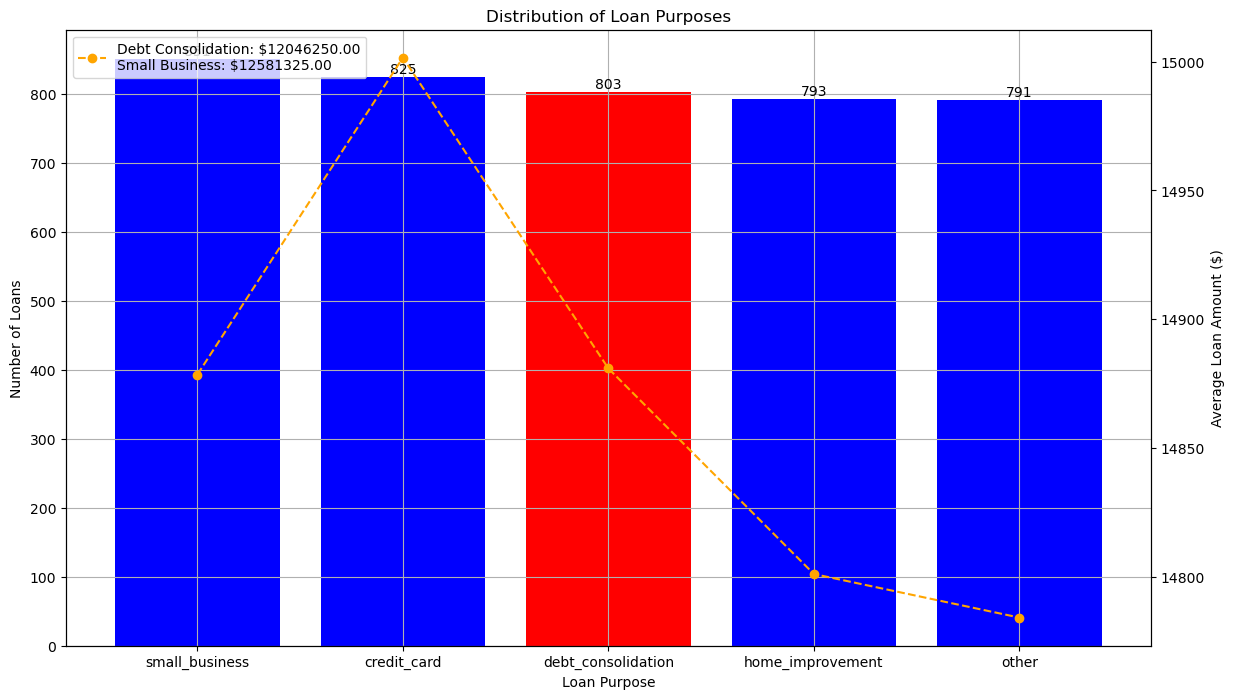

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('short_df.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Filter for debt consolidation and small business loans
debt_consolidation_df = df[df['loan_purpose'] == 'debt_consolidation']
small_business_df = df[df['loan_purpose'] == 'small_business']

# Calculate relevant statistics
num_debt_consolidation_loans = len(debt_consolidation_df)
avg_loan_amount_debt_consolidation = debt_consolidation_df['loan_amnt'].mean()
total_loan_amount_debt_consolidation = debt_consolidation_df['loan_amnt'].sum()

num_small_business_loans = len(small_business_df)
avg_loan_amount_small_business = small_business_df['loan_amnt'].mean()
total_loan_amount_small_business = small_business_df['loan_amnt'].sum()

# Print statistics
print(f'Number of Debt Consolidation Loans: {num_debt_consolidation_loans}')
print(f'Average Loan Amount for Debt Consolidation: ${avg_loan_amount_debt_consolidation:.2f}')
print(f'Total Loan Amount for Debt Consolidation: ${total_loan_amount_debt_consolidation:.2f}')

print(f'Number of Small Business Loans: {num_small_business_loans}')
print(f'Average Loan Amount for Small Business: ${avg_loan_amount_small_business:.2f}')
print(f'Total Loan Amount for Small Business: ${total_loan_amount_small_business:.2f}')

# Count the occurrences of each loan purpose
purpose_counts = df['loan_purpose'].value_counts()
avg_loan_amounts = df.groupby('loan_purpose')['loan_amnt'].mean()

# Plot the distribution of loan purposes
fig, ax1 = plt.subplots(figsize=(14, 8))

bars = ax1.bar(purpose_counts.index, purpose_counts.values, color=['blue' if purpose != 'debt_consolidation' else 'red' for purpose in purpose_counts.index])
ax1.set_xlabel('Loan Purpose')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Distribution of Loan Purposes')
ax1.grid(True)

# Annotate the bars with the exact number of loans
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Create a second y-axis to show the average loan amounts
ax2 = ax1.twinx()
ax2.plot(purpose_counts.index, avg_loan_amounts.values, color='orange', marker='o', linestyle='dashed')
ax2.set_ylabel('Average Loan Amount ($)')
ax2.legend(['Average Loan Amount'], loc='upper right')

# Add legend with total loan amounts for debt consolidation and small business
total_loan_info = f'Debt Consolidation: ${total_loan_amount_debt_consolidation:.2f}\nSmall Business: ${total_loan_amount_small_business:.2f}'
plt.legend([total_loan_info], loc='upper left')

plt.show()


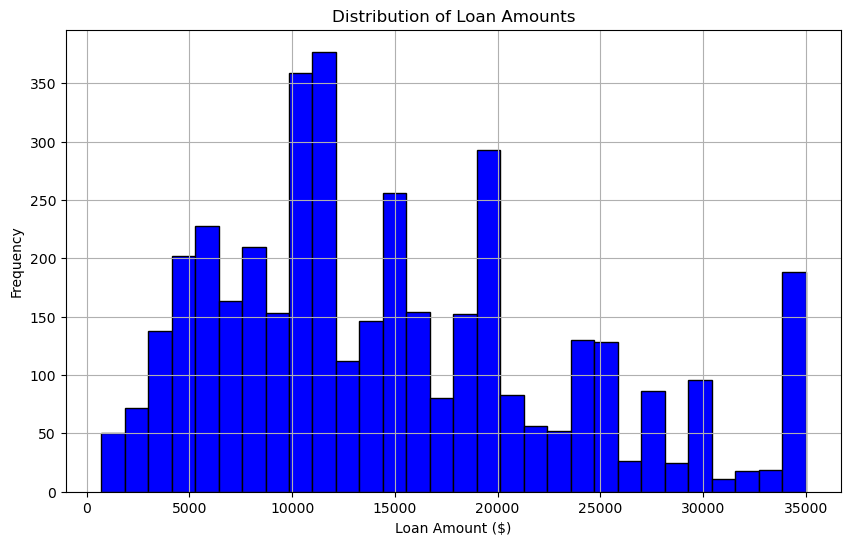

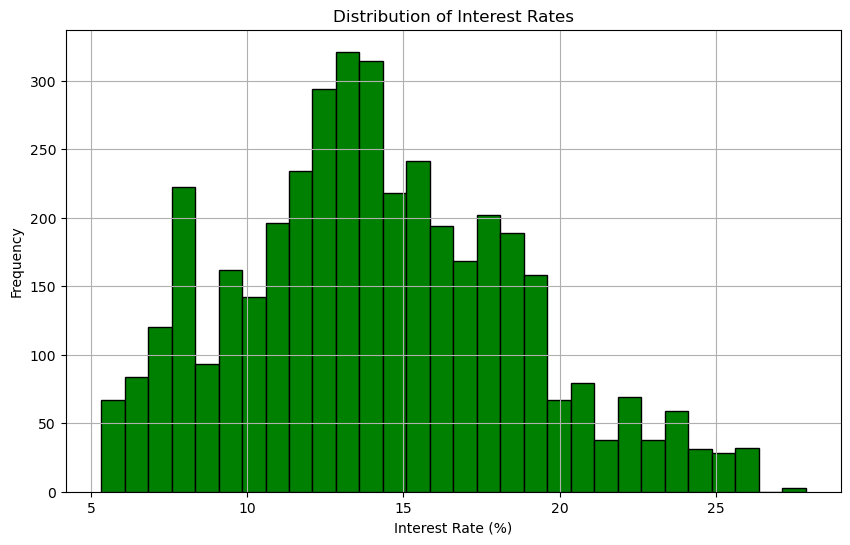

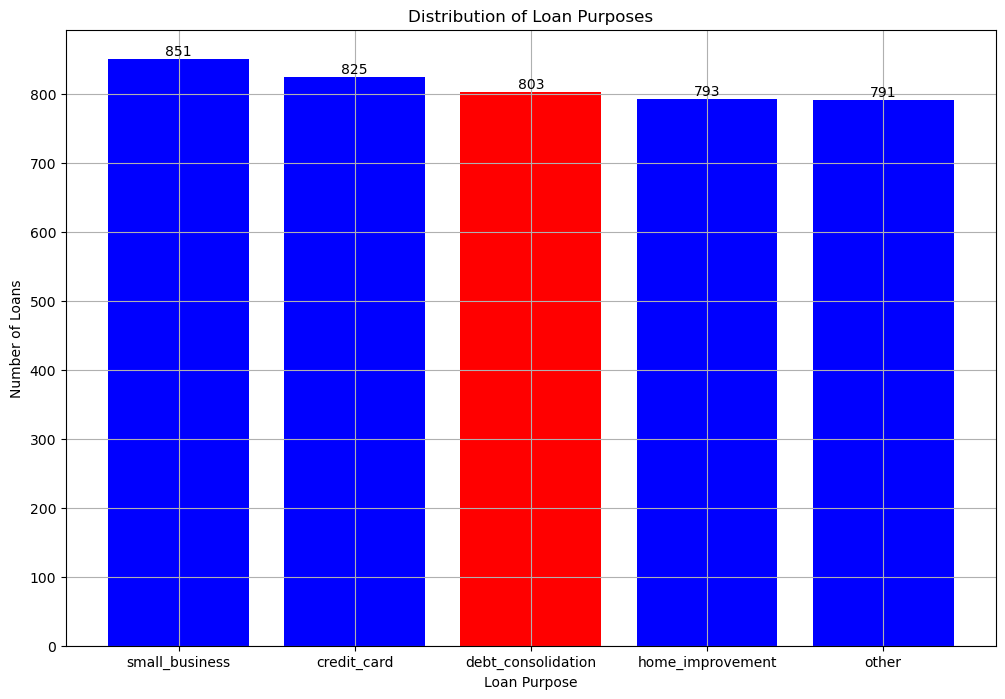

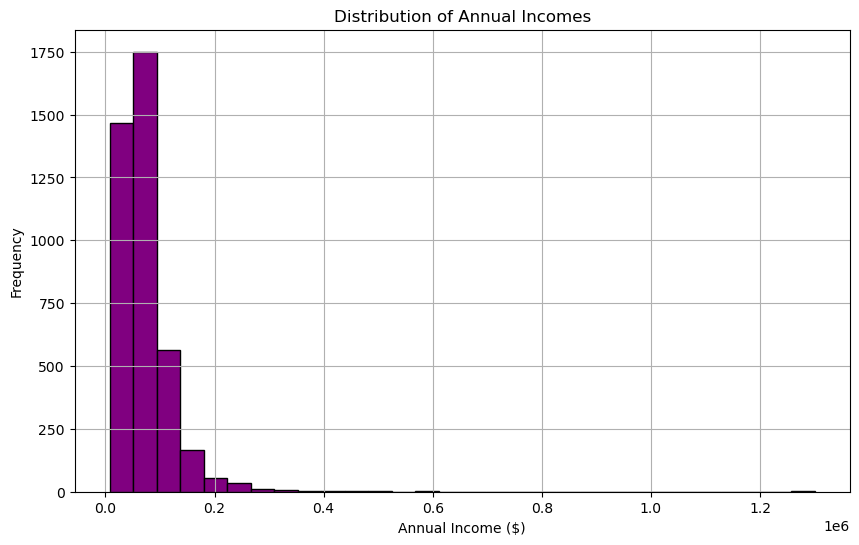

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


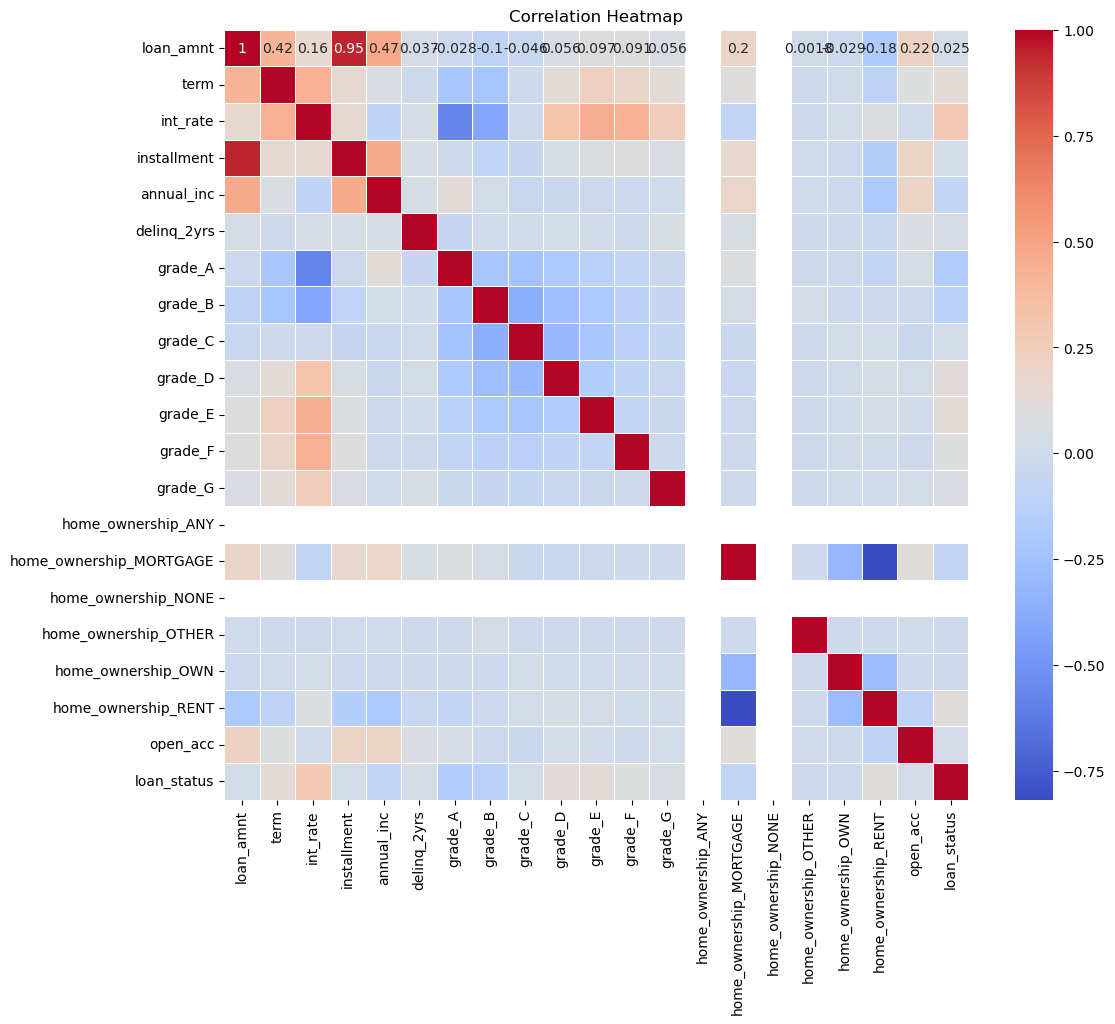

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('short_df.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# 1. Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Interest Rate Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Loan Purpose Distribution
purpose_counts = df['loan_purpose'].value_counts()
plt.figure(figsize=(12, 8))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=['blue' if purpose != 'debt_consolidation' else 'red' for purpose in purpose_counts.index])
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.grid(True)
# Annotate the bars with the exact number of loans
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
plt.show()

# 4. Income Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['annual_inc'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Annual Incomes')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. Correlation Heatmap
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


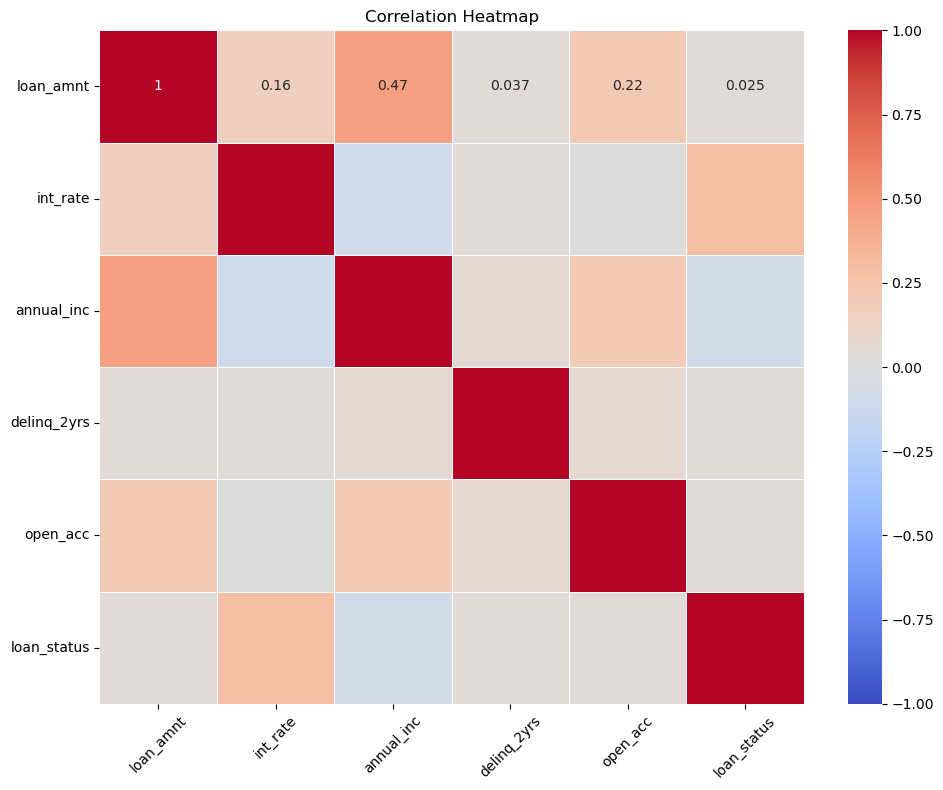

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('short_df.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Select a subset of important numeric columns for correlation calculation
important_numeric_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs', 'open_acc', 'loan_status']
correlation_matrix = df[important_numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('short_df.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Filter for debt consolidation loans
debt_consolidation_df = df[df['loan_purpose'] == 'debt_consolidation']

# Calculate relevant statistics for debt consolidation
total_loan_amount_debt_consolidation = debt_consolidation_df['loan_amnt'].sum()
avg_loan_amount_debt_consolidation = debt_consolidation_df['loan_amnt'].mean()

# Print statistics
print(f'Total Loan Amount for Debt Consolidation: ${total_loan_amount_debt_consolidation:.2f}')
print(f'Average Loan Amount for Debt Consolidation: ${avg_loan_amount_debt_consolidation:.2f}')


Total Loan Amount for Debt Consolidation: $12046250.00
Average Loan Amount for Debt Consolidation: $15001.56
